## **What is Stable Diffusion?**
Stable Diffusion is a state-of-the-art AI model designed to `generate images based on textual descriptions`. It operates through a process of iterative noise removal, transforming random patterns into coherent and high-quality visuals guided by a text prompt. This model generates photorealistic, artistic, and conceptual imagery, making it highly versatile for use in fields such as graphic design, digital art, advertising, and creative ideation. Stable Diffusion’s efficiency, coupled with its ability to render intricate details, empowers users to bring their imaginations to life with remarkable precision.

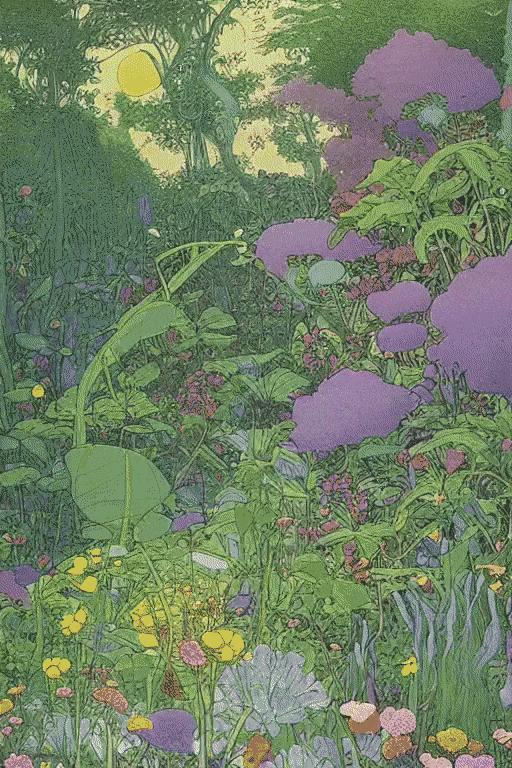

## **Project Description**
This project is a Streamlit-based AI Image Generator that utilizes the powerful Stable Diffusion model to transform text prompts into visually compelling images. It provides a simple, interactive interface where users can enter a description of the desired image, and the system generates the artwork in real-time. By leveraging GPU-accelerated processing, the application ensures fast and smooth performance, delivering high-quality visuals within seconds. The project is designed to be accessible to users across skill levels, from professional designers and artists to enthusiasts exploring creative possibilities. Whether for brainstorming, concept visualization, or pure artistic expression, this tool bridges the gap between ideas and visual realization.


In [ ]:
!pip install transformers diffusers accelerate
!pip install xformers
!pip install pillow
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00




```
[User Interface] --> [Request Handling] --> [Server with Stable Diffusion] --> [Image Generation]
^                                                                                   |
|                                                                                   v
+-- [Response (Generated Image)] <---- [Bandwidth Handling] <-- [SSRDK Data Routing]

```



In [ ]:
!pip uninstall -y torchvision

Found existing installation: torchvision 0.20.1+cu121
Uninstalling torchvision-0.20.1+cu121:
  Successfully uninstalled torchvision-0.20.1+cu121


In [ ]:
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 99.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=89991 sha256=88ce78c23e2d51d3f80ac9c6d71dde9bbc16de9645419065710e728629d7a2d8
  Stored in directory: /root/.cache/pip/wheels/27/2c/b6/3ed2983b1b44fe0dea1bb35234b09f2c22fb8ebb308679c922
Successfully built lit
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu121
    Uninstalling torch-2.5.1+cu121:


In [ ]:
!pip install torchaudio==2.0.2+cu118 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 48.1 MB/s eta 0:00:00
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.5.0+cu121
    Uninstalling torchaudio-2.5.0+cu121:
      Successfully uninstalled torchaudio-2.5.0+cu121


In [ ]:
# from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import io
import streamlit as st

# # FastAPI setup
# app = FastAPI()

# Model loading (Stable Diffusion)
model_id = "dreamlike-art/dreamlike-photoreal-2.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
!pip install pyngrok

In [ ]:
ngrok.set_auth_token("2nWIQOYDefzI6mjy6kmdYvSFMGe_22BHuGCW8eVmtbrra6myt")

In [ ]:
!export NGROK_AUTHTOKEN="2nWIQOYDefzI6mjy6kmdYvSFMGe_22BHuGCW8eVmtbrra6myt"

In [ ]:
from pyngrok import ngrok

# Set up ngrok tunnel for Streamlit
public_url = ngrok.connect(addr='8501')
print(f"Access your Streamlit app at {public_url}")

Access your Streamlit app at NgrokTunnel: "https://db17-34-121-45-155.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
%%writefile app.py
import streamlit as st
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import io

# Load the model
model_id = "dreamlike-art/dreamlike-photoreal-2.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# Streamlit app
st.title("Stable Diffusion Image Generator")

# Input prompt
prompt = st.text_input("Enter your prompt:")

if st.button("Generate Image"):
    if prompt:
        with st.spinner("Generating image..."):
            try:
                # Generate image
                image = pipe(prompt).images[0]

                # Display the image
                st.image(image, caption="Generated Image", use_container_width=True)
            except Exception as e:
                st.error(f"Error generating image: {e}")
    else:
        st.warning("Please enter a prompt.")

Writing app.py


In [ ]:
!streamlit run app.py &

from pyngrok import ngrok
# Set up ngrok tunnel for Streamlit
public_url = ngrok.connect(port='8501')
print(f"Access your Streamlit app at {public_url}")




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.121.45.155:8501

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2024-11-14 20:05:53.151413: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-14 20:05:53.176445: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN facto

  Stopping...


PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}


## Documentation Link


*   [Notepad References](https://drive.google.com/file/d/1cT3JE53fFEZPLPdPS5WjSQTDtiaGTZBT/view?usp=sharing)


